**Team 1**: Indira Aitkulova, Antonio Azevedo, Alex Chae, Ashley Nguyen


---



**Dataset**: Traffic Crash


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, accuracy_score
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import mutual_info_regression

In [ ]:
input_path =  '/content/drive/My Drive/Junior Spring/Applied Data Science/Project/' #Alex

df = pd.read_csv(input_path + "final.csv",low_memory=False)

# Introduction

## Motivation

Our research was first motivated by the presence of stereotypes against female drivers. In society, it is quite common to here people saying that female drivers are worse drivers, make more mistakes, and drive dangerously. Berger (1986) provides a historical overview of the origins of such stereotypes. As the traditional American family life values women staying at home as wives and mothers and maintaining a car was considered to be a sign of masculinity, women drivers were often portrayed negativeyl as dangerous in folklores and this continue until now to become negative stereotypes.

However, there are recent evidence that this stereotype is changing. In a survey conducted by an insurance company in 2011, 51% of women said that women drive safer, while only 39% of men said that men drive safer than women (Edgerson, 2011). Also, data shows that youngest males are likely to die with speed driving and that men are 3.1 times more likely to be drunk driving. Hence, men tend to be more associated with driving behavior.

These show that while there seems to be a relationship between driver’s sex and car crashes, it is difficult to say to which direction or by how much.


## Literature Review

So to investigate more in this topic, we looked into the literature in the field, but found that results were really conflicting.

There are a handful of research suggesting that women drivers are more dangerous, especially older women. For example, Baker et al (2001) find the women over 70 years of age are overrepresented in car crashes that happen in the safest conditions (i.e. conditions where a crash is unlikely to happen). Chipman (1993) also suggest that older women causes more crashes when they are driving long distances. In terms of the data, Massie (1995) suggest that women are more involved in all police-reported crashes and the same author also shows that women tend to have lower annual mileages, which causes more car crashes.  

Meanwhile, other literature suggests that men, especially young males, tend to drive more dangerously. Drunk driving is a big problem among male drivers in northern Sweden (Ostrom, 2005). Also men are more likely to be invovled in a fatal crash that results in death (Chipman, 1993). Similarly, Massie (1997) show that men have a higher risk of crash in all lighting conditions for all levels of severity, and especially for fatal crashes. Also, another experimental research suggests that women drivers make more mistakes when they are stereotyped.

So while the results are mixed, they all say one same thing: Driver's gender is not the only determinant of car crashes and there is a necessity to examine other variables, such as age, presence of stereotypes and alcohol use.

Because car crash outcomes is very broad, we wanted to focus on a specific metric to measure crash outcome. One study in particular, conducted by Perez (2014) in Spain used injury risk as a measure of traffic crash severity. Here, they found that sex and age are two important variables in determining the injury risk, although there were other variables like mode of transport involved as well. So we refer to this study and also use injury as a measure of the car crash outcome and plan to examine the complex relationship as well. We are focusing on the city of Chicago, where our dataset is from.

In this project, we plan to add to the existing literature by analyzing a real life dataset of car crashes in Chicago. As we will see, this dataset includes demographic information of drivers along with various external variables that we can observe. We will use statistical methods and machine learning models to predict the influence of gender on car crashes in the presence of other control variables. So because the literature is quite mixed in terms of the direction of the relationship, we predict that gender will influence car crash outcomes, but we don't predict which direction.

Moreover, while there are some undergraduate and masters-level studies that analyze car crashes in Chicago, none of them from our knowledge closely examine the influence of the driver's gender on car crash outcomes. Hence, our research adds to the existing literature focusing on the car crash outcomes in the city of Chicago, focusing on the gender differential.

## Variables & Hypothesis

**Independent Variable**: Driver's sex (female/ non-female)
- This is a binary variable. "1" represents female drivers and "0" represents drivers of other sex.



**Dependent Variable**: Weighted injury rate
- Calculated by number of people involved in a crash with weighted levels of injury / total number of people in a crash


**Hypothesis**: There is a difference in injury rate in crashes with female drivers compared to drivers of other genders.

With these main variables and hypothesis, we aim to measure the influence of the driver's gender on the degree of injury that a car crash causes. We have conducted exploratiry data analysis to conduct feature selection to build a model which accommodates for other control variables. And finally we use various machine learning models to find the influence of driver's gender on injury rate.

We have explored in Milestones 2 and 3 the distributions of our main variables. The independent variable `sex` , which refers to the driver's sex is distributed as the following. Around 40% of the car crashes represented in our dataset involve female drivers and the rest involve drivers of other genders. We will comment on the dependent variable along with other features in the coming sections.


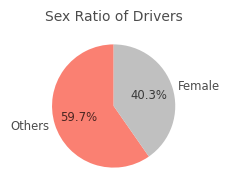

After constructing the hypothesis, we conducted a basic t-test to confirm that there is a difference in weighted injury rate based on the driver's gender. In Milestone 2, the t-test constructed under the null hypothesis that the difference in mean injury rate between the two groups is 0 and the alternative hypothesis that there is a difference in mean injury rate between the two groups was statistically significant.

In [ ]:
alpha = 0.1   # define alpha

# two sample ttest
teststat, pvalue = stats.ttest_ind(df[df['sex'] == 0]['weighted_injury_rate'].dropna(), df[df['sex'] == 1]['weighted_injury_rate'].dropna())
print("T statistic:", teststat, "p-value:", pvalue, end="\n")

# check whether the p-value is significant
if pvalue < alpha:
  print("We reject the null hypothesis")

else:
  print("We fail to reject the null hypothesis")

T statistic: -5.351180165190701 p-value: 8.739310324864227e-08
We reject the null hypothesis


Hence, there is evidence that driver's sex somehow influences the injury rate. However, as noted in the literature review, we cannot conclude that driver's gender is the only determinant of injury rate. Therefore, we explore other variables as well using a comprehensive datset.

# Our Data

## Obtaining The Data
Our group has chosen to work with one of the provided datasets. Therefore, we downloaded the necessary files from the Brightspace learning management system. Overall, we downloaded 6 files and 4 of them are particular interest for us:
*  "README_Crash Dataset.docx" - README file that contains information about the dataset
*  "Traffic_Crashes_-_Crashes" - Crash data shows information about each traffic crash on city streets within the City of Chicago limits and under the jurisdiction of Chicago Police Department (CPD). Data are shown as is from the electronic crash reporting system (E-Crash) at CPD, excluding any personally identifiable information.
*  "Traffic_Crashes_-_People" - This data contains information about people involved in a crash and if any injuries were sustained.
*  "Traffic_Crashes_-_Vehicles" - This dataset contains information about vehicles (or units as they are identified in crash reports) involved in a traffic crash.

## Reading The Data
Before exploring and manipulating data in Python, it needs to be loaded first. Nevertheless, since Google Colab runs all code on an external server, files must be manually uploaded to that server before they can be accessed.

To simplify the process, the recommended approach in Google Colab is to upload the data to Google Drive and import it from there.

The dataset we are interested in consists of 3 csv files (Traffic_Crashes_-_Crashes.csv, Traffic_Crashes_-_People.csv, and Traffic_Crashes_-_Vehicles.csv). In this section we download all of them.

In [ ]:
# Import necessary libraries

import numpy as np
import pandas as pd
import datetime
import os
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Input pathes
input_path = '/content/drive/My Drive/Colab Notebooks/Applied Data Science/Project/Traffic Crash/'#Indira
#input_path = '/content/drive/MyDrive/EY 2022-2023 Junior/Spring 2023/SOCSC-UH 2214 Applied Data Science/project/Traffic Crash/' #Ashley
#input_path = '/content/drive/MyDrive/Junior Spring/Applied Data Science/Project/Traffic Crash/' #Alex
#input_path = '/content/drive/MyDrive/Applied Data Science/Project/Traffic Crash/'  #Antonio

In [ ]:
# To read a file, we first load it into a Pandas DataFrame
# We use , low_memory=False to prevent Pandas from reading the file in chunks and trying to infer the data types.
import pandas as pd
crashes = pd.read_csv(input_path + 'Traffic_Crashes_-_Crashes.csv', low_memory=False)
vehicles = pd.read_csv(input_path + 'Traffic_Crashes_-_Vehicles.csv', low_memory=False)
people = pd.read_csv(input_path + 'Traffic_Crashes_-_People.csv', low_memory=False)

## Cleaning data

In [ ]:
# Keep only the columns related to the problem statement

crashes = crashes.loc[:, ['CRASH_RECORD_ID', 'CRASH_DATE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'CRASH_TYPE', 'DAMAGE', 'INJURIES_TOTAL','INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN']]
people = people.loc[:, ['PERSON_ID','PERSON_TYPE', 'CRASH_RECORD_ID', 'SEX', 'AGE', 'SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED', 'INJURY_CLASSIFICATION']]
vehicles = vehicles.loc[:, ['VEHICLE_ID', 'CRASH_RECORD_ID', 'MAKE', 'MODEL', 'VEHICLE_YEAR', 'VEHICLE_TYPE']]

In [ ]:
# Merging 3 dataframes by the CRASH_RECORD_ID column
merged_df = pd.merge(pd.merge(crashes, people, on='CRASH_RECORD_ID', how='outer'), vehicles, on='CRASH_RECORD_ID', how='outer')

In [ ]:
# Define the output directory and file name
output_directory = "/ADS_Milestone1/"
filename = 'merged.csv'

# Create the directory if it does not exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Save the DataFrame as a CSV file
merged_df.to_csv("/content/drive/MyDrive/ADS_Milestone1/merged.csv", index=False)

In [ ]:
unique_len = len(merged_df["CRASH_RECORD_ID"].unique())
entire_len = len(merged_df["CRASH_RECORD_ID"])

print(unique_len, entire_len)
print(unique_len == entire_len)

In [ ]:
#getting rid of duplicates
merged_df = merged_df[~merged_df.duplicated()]
merged_df.shape

In [ ]:
#type conversion
merged_df["CRASH_DATE"]=pd.to_datetime(merged_df["CRASH_DATE"], errors= 'ignore')
merged_df["VEHICLE_YEAR"]=pd.to_datetime(merged_df["VEHICLE_YEAR"], errors= 'ignore')

In [ ]:
#Nans
merged_df.loc[merged_df["DEVICE_CONDITION"] == "UNKNOWN", "DEVICE_CONDITION"] = None
merged_df.loc[merged_df["DEVICE_CONDITION"] == "MISSING", "DEVICE_CONDITION"] = None
merged_df.loc[merged_df["WEATHER_CONDITION"] == "UNKNOWN", "WEATHER_CONDITION"] = None
merged_df.loc[merged_df["LIGHTING_CONDITION"] == "UNKNOWN", "LIGHTING_CONDITION"] = None
merged_df.loc[merged_df["SAFETY_EQUIPMENT"] == "USAGE UNKNOWN", "SAFETY_EQUIPMENT"] = None
merged_df.loc[merged_df["AIRBAG_DEPLOYED"] == "DEPLOYMENT UNKNOWN", "AIRBAG_DEPLOYED"] = None
merged_df.loc[merged_df["AIRBAG_DEPLOYED"] == "NOT APPLICABLE", "AIRBAG_DEPLOYED"] = None

In [ ]:
merged_df = merged_df[((merged_df['AGE'] >= 16) & (merged_df['PERSON_TYPE'] == 'DRIVER')) | (merged_df['PERSON_TYPE'] != 'DRIVER')]
merged_df.shape

In [ ]:
merged_df.loc[merged_df["MAKE"] == "UNKNOWN", "MAKE"] = None
merged_df.loc[merged_df["MODEL"] == "UNKNOWN", "MODEL"] = None
merged_df.loc[merged_df["MODEL"] == "OTHER (EXPLAIN IN NARRATIVE)", "MODEL"] = None
merged_df['MAKE_MODEL'] = merged_df['MAKE'] + " " + merged_df['MODEL']

In [ ]:
injuries_df = merged_df[['INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
           'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN']][merged_df['INJURIES_TOTAL'].isnull()]

In [ ]:
merged_df = merged_df[(merged_df["INJURIES_TOTAL"].isna()== False)|(merged_df["INJURIES_FATAL"].isna()==False)|(merged_df["INJURIES_INCAPACITATING"].isna()==False)|(merged_df["INJURIES_NON_INCAPACITATING"].isna()==False)|(merged_df["INJURIES_REPORTED_NOT_EVIDENT"].isna()==False)|(merged_df["INJURIES_NO_INDICATION"].isna()==False)|(merged_df["INJURIES_UNKNOWN"].isna()==False)]

## Improving Dependent Variable (Weighted Injury Rate)

Our first dependent variable was injury rate, which is the proportion of people involved in a car crash that got injured, without differentiating different degrees of injuries. To improve upon this definition, we made a new dependent variable `weighted_injury_rate`, which incorporates different injury levels based on severity by giving different weights.

For the new dependent variable, we will give different weights to injuries based on severity. The ranking is as follows in descending order:
1. Fatal injuries
2. Capacitating injuries
3. Non capacitating injuries
4. Not evident injuries
5. Injuries unknown
6. Injuries_no_indication

Injuries unknown are ranked higher than no indication injuries because injuries unknown is typically used when it is known that some injuries occurred, but there is not enough information available to determine the extent or severity of those injuries while injuries_no_indication" is typically used when there is no information available about whether or not anyone was injured in the event being reported.


In the below code, we assign different weights to each level of injury rate, ranging between 0 and 1, where 0 indicates the no injury and 1 indiciates the most severe level of injury. The new weighted dependent variable is called `weighted_injury_rate`.


In [ ]:
# Assigning different weights to levels of injury
weights = ({'injuries_fatal': 1.0, 'injuries_incapacitating': 0.8,
            'injuries_non_incapacitating': 0.6, 'injuries_reported_not_evident': 0.4,
            'injuries_unknown': 0.2, 'injuries_no_indication': 0})

col_injuries= (['injuries_total', 'injuries_fatal', 'injuries_incapacitating',
                'injuries_non_incapacitating', 'injuries_reported_not_evident',
                'injuries_no_indication', 'injuries_unknown'])

# apply the weights to injury columns
merged_df['weighted_totals'] = merged_df.apply(lambda row: sum([row[col] * weights[col] for col in weights]), axis=1)

# make the final dependent variable
merged_df['weighted_injury_rate']= (merged_df['weighted_totals'] / merged_df['total_ppl']) * 100

Now we will modify some of the features that are categorical. As categorical features cannot be used directly as features in a regression model, we will transform them into dummy variables. Below, we create a column for each category in the 4 categorical variables we have.

In [ ]:
#device conditions
device_conditions = merged_df['device_condition'].dropna().unique().tolist()    # list of different values in 'device_conditions' column
for i in device_conditions:                                                     # make each value a dummy variable
    merged_df["device_condition_"+i.lower()] = (merged_df["device_condition"] == i).astype(int)

#weather conditions
weather_conditions = merged_df['weather_condition'].dropna().unique().tolist()
for i in weather_conditions:
    merged_df["weather_condition_"+i.lower()] = (merged_df["weather_condition"] == i).astype(int)

#lightning conditions
lighting_conditions = merged_df['lighting_condition'].dropna().unique().tolist()
for i in lighting_conditions:
    merged_df["lighting_condition_"+i.lower()] = (merged_df["lighting_condition"] == i).astype(int)

#vehicle defects
lighting_conditions = merged_df['vehicle_defect'].dropna().unique().tolist()
for i in lighting_conditions:
    merged_df["vehicle_defect_"+i.lower()] = (merged_df["vehicle_defect"] == i).astype(int)

## Data Description

In [ ]:
#Summary statistics
binary=exfac_cols+weather_cols+vehicles_cols+["sex", "any_injuries"]
import pandas as pd

variable_names = []
num_zeros = []
num_ones = []
total_counts = []
means=[]
# Iterate over the binary variables and calculate the counts
for var in binary:
    counts = df_class[var].value_counts()
    num_zeros.append(counts.get(0, 0))
    num_ones.append(counts.get(1, 0))
    means.append(df_class[var].mean())
    total_counts.append(df_class[var].count())
    variable_names.append(var)

# Create a DataFrame with the results
result_df = pd.DataFrame({'Variable': variable_names,
                          'Number of 0s': num_zeros,
                          'Number of 1s': num_ones,
                          'Mean': means,
                          'Total Count': total_counts})

# Print the resulting table
print(result_df)


## Visualization

Because we changed the dependent variable and added some new dummy variables as features, we continue with our exploratory data analysis, mainly through different visualizations. The main change comes in visualizing the distribution of our new dependent variable:

<Axes: xlabel='injury_ratio', ylabel='Count'>

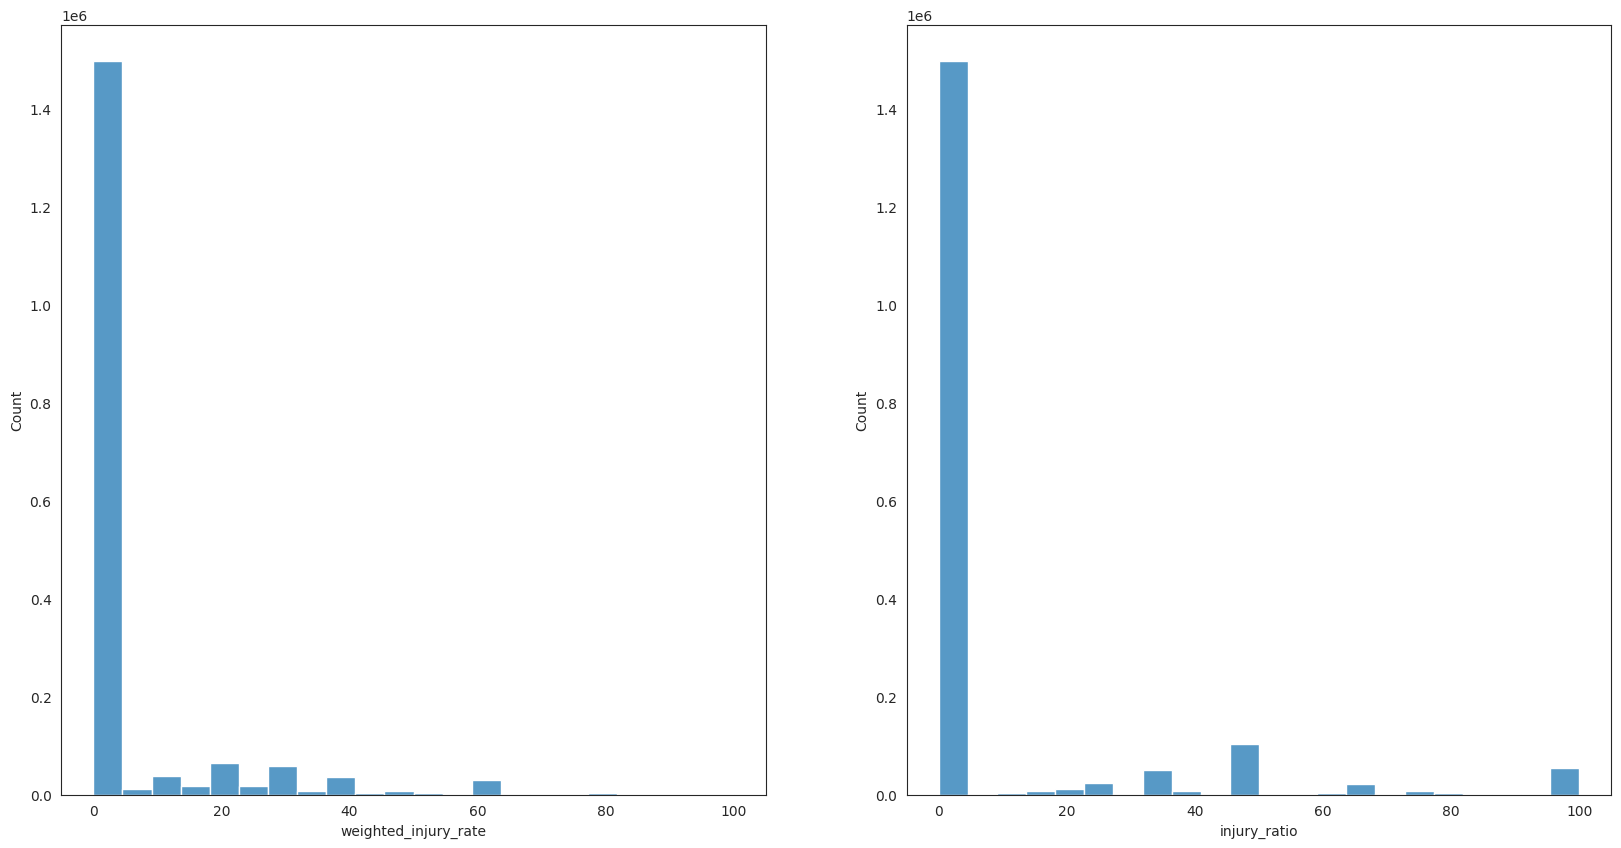

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
sns.histplot(df['weighted_injury_rate'],ax=axs[0])
sns.histplot(df['injury_ratio'],ax=axs[1])

Notice the 0 value dominates the plot. If we want better insight on what the weighted injury rate looks like for accidents that had some form of injury, we can zoom into the non-zero part:

<Axes: xlabel='injury_ratio', ylabel='Density'>

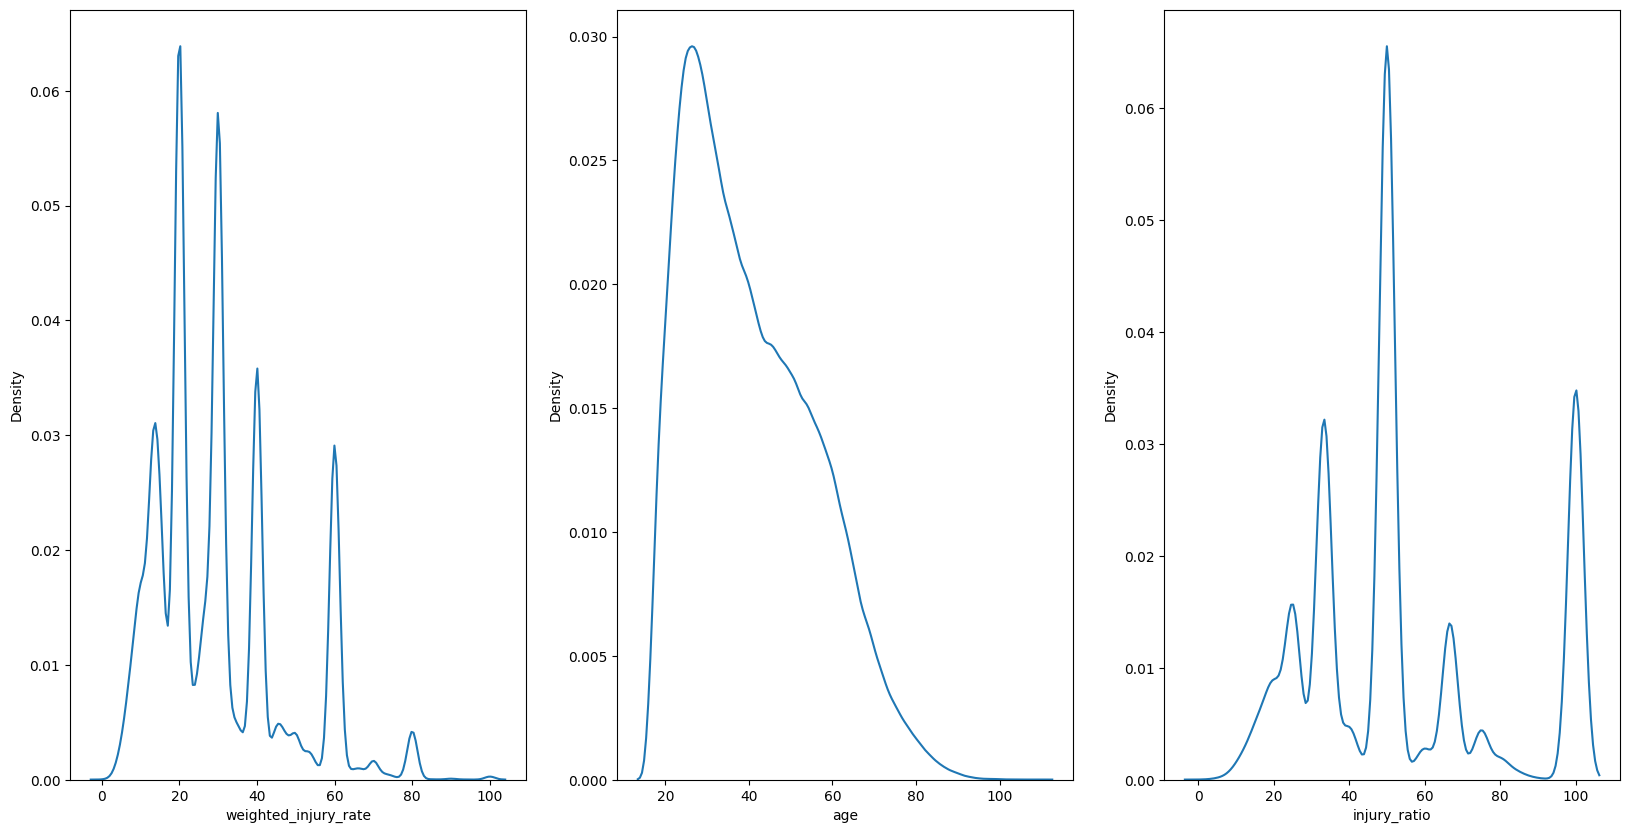

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
sns.kdeplot(df[df['weighted_injury_rate'] > 0]['weighted_injury_rate'], ax=axs[0])
sns.kdeplot(df[df['injury_ratio'] > 0]['injury_ratio'], ax=axs[1])


Another way to try to understand the spread of our new dependent variable is through a boxplot, which will show us the interquartile range for all nonzero values:

<Axes: xlabel='injury_ratio'>

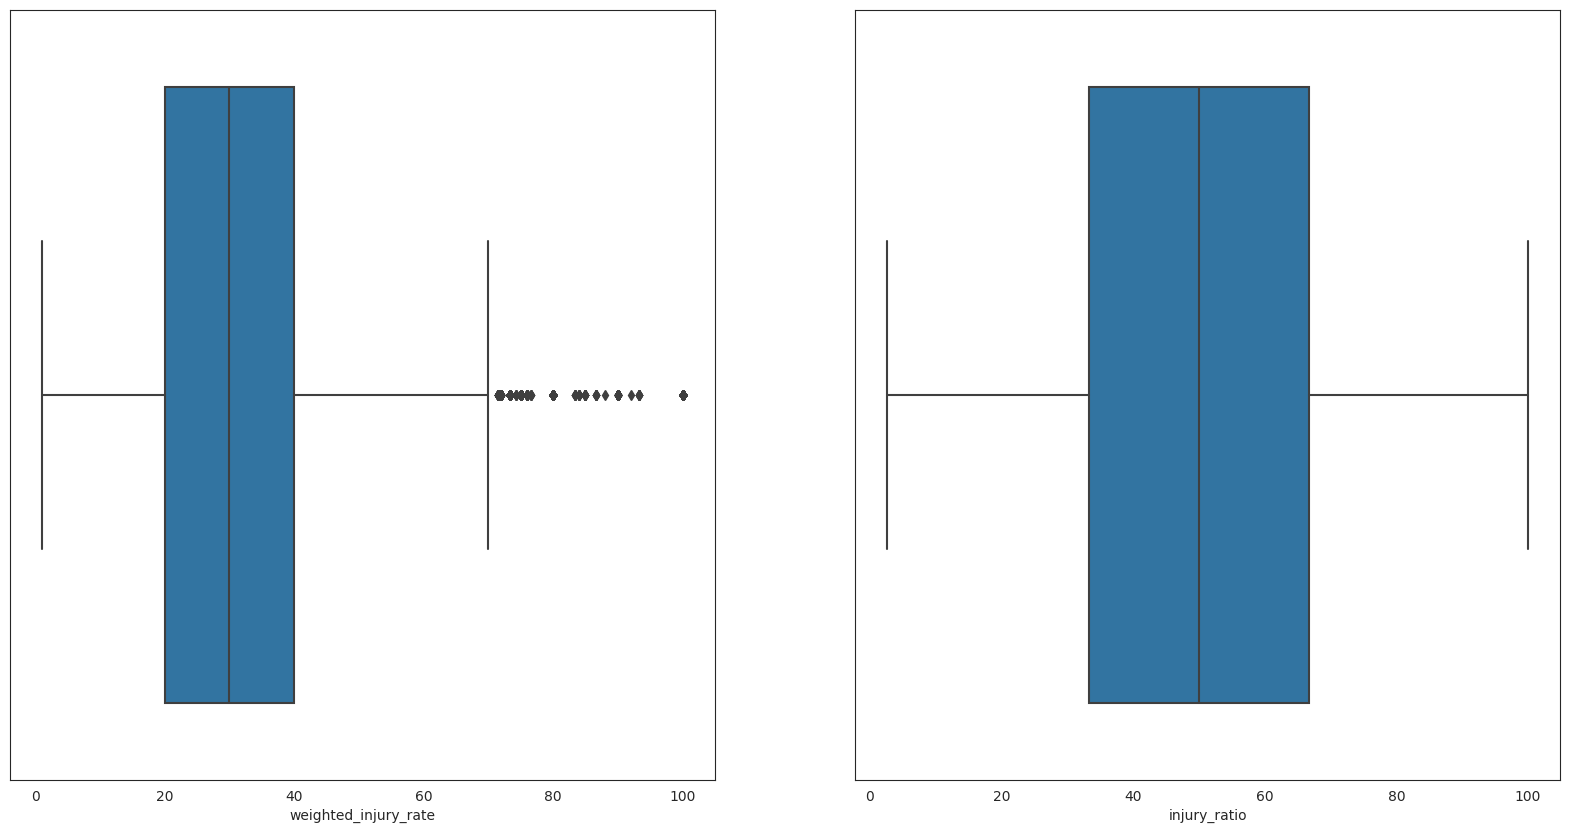

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
sns.boxplot(data=df[df['weighted_injury_rate']>0], x="weighted_injury_rate",ax=axs[0])
sns.boxplot(data=df[df['injury_ratio']>0], x="injury_ratio",ax=axs[1])

From this simple boxplot, we can already notice how values with injury rate larger than about 70% are outliers (heavier accidents are more uncommon), whereas the original variable had a lot of values in the entire range.

One interesting way in which a weighted injury rate might help visualize gender differences is by its geographical disposition in the city of Chicago by gender. We can generate it using the geopandas library as follows:

In [ ]:
# Install necessary libraries
!pip install descartes
!pip install geopandas
!pip install mapclassify

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
import folium
import mapclassify

%matplotlib inline
# Source: 'Mariana, A. (2021, April 15). Geopandas 101: Plot any data with a latitude and longitude on a map.
# Towards Data Science. https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 64.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 57.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df.dropna(subset=['longitude', 'latitude'], inplace=True)
df = df[(df['longitude'] != 0) & (df['latitude'] != 0)]
# Import the shapefile of Chicago map
chicago_map = gpd.read_file(input_path+'chicago.shp')
# Prepare the data
geometry1 = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
crs = {'init':'epsg:4326'}
geo_df = gpd.GeoDataFrame(df,
                          crs = crs,
                          geometry = geometry1)

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


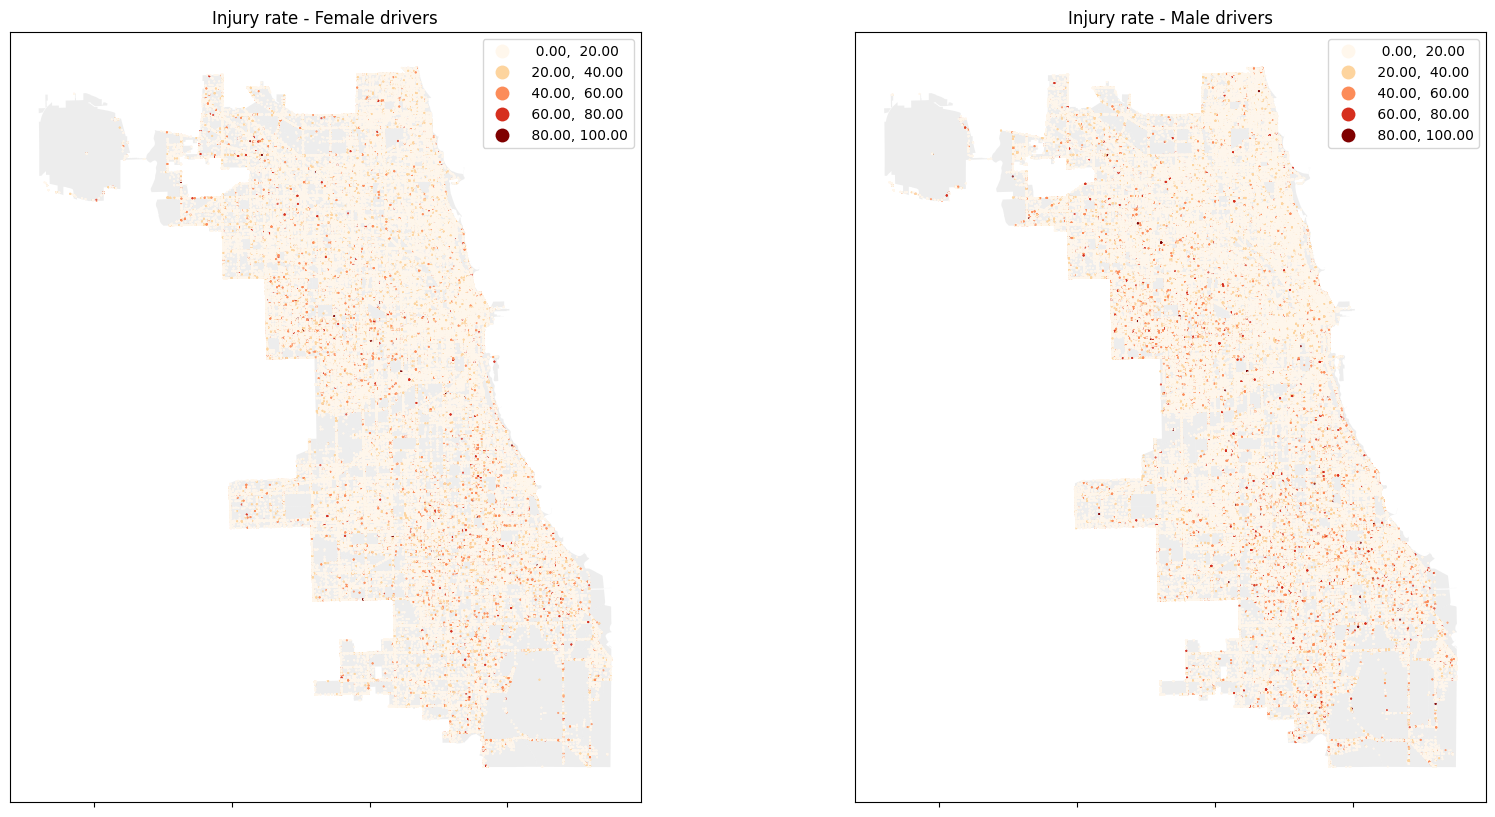

In [ ]:
# Plot with color-coded points based on sex variable
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

chicago_map.plot(ax=axs[0], alpha=0.4, color='lightgrey')
geo_df[geo_df['sex']==1].plot(column='weighted_injury_rate', ax=axs[0],markersize=0.2,scheme='equal_interval', legend=True, cmap='OrRd')
axs[0].set_title('Injury rate - Female drivers')

chicago_map.plot(ax=axs[1], alpha=0.4, color='lightgrey')
geo_df[geo_df['sex']==0].plot(column='weighted_injury_rate', ax=axs[1],markersize=0.2,scheme='equal_interval', legend=True, cmap='OrRd')
axs[1].set_title('Injury rate - Male drivers')

axs[0].tick_params(top=False,bottom = False, labelbottom=False,left=False,right=False, labelleft=False)
axs[1].tick_params(top=False,bottom = False, labelbottom=False,left=False,right=False, labelleft=False)

plt.show()

After exploring the data, we are now ready to build machine learning models to see the influence of driver's sex on weighted injury rate.

## Feature Selection

In Milestone 2 and 3, we ran several statistical tests to see which variables among the ones we have are potentially confounding variables which influence the weighted injury rate of a car crash.

After making the categorical variables into dummy variables, we
Further, based on feature importance, we identified the features to keep in the model and those to omit.

In total, our dataset has 47 features. However, before running models with all of these features, we conducted feature selection to see if some of them are not necessary. We first collect all the possible features that can influence a model. Then, we'll process them with a train/test split and use scikit's mutual information regression model, which uses an entropy-based approach to compute mutual information between a variable and another. In our case, we'll compute each variable's mutual information with our target variable, the weighted injury rate.

In [ ]:
# External factor variables
exfac_cols = ['device_condition_functioning properly', 'device_condition_no controls',
       'device_condition_not functioning',
       'device_condition_functioning improperly', 'device_condition_other',
       'device_condition_worn reflective material', 'device_condition_missing',
       'lighting_condition_daylight',
       'lighting_condition_darkness, lighted road',
       'lighting_condition_darkness', 'lighting_condition_dawn',
       'lighting_condition_dusk']

# Weather-related variables
weather_cols=['weather_condition_clear', 'weather_condition_cloudy/overcast',
       'weather_condition_snow', 'weather_condition_rain',
       'weather_condition_freezing rain/drizzle',
       'weather_condition_fog/smoke/haze', 'weather_condition_other',
       'weather_condition_blowing snow', 'weather_condition_sleet/hail',
       'weather_condition_severe cross wind gate',
       'weather_condition_blowing sand, soil, dirt']

# Vehicle-related variables
vehicles_cols = ['vehicle_age', 'vehicle_defect_none',
       'vehicle_defect_unknown', 'vehicle_defect_brakes',
       'vehicle_defect_other', 'vehicle_defect_tires',
       'vehicle_defect_suspension', 'vehicle_defect_windows',
       'vehicle_defect_lights', 'vehicle_defect_wheels',
       'vehicle_defect_engine/motor', 'vehicle_defect_steering',
       'vehicle_defect_signals', 'vehicle_defect_fuel system',
       'vehicle_defect_restraint system', 'vehicle_defect_cargo',
       'vehicle_defect_trailer coupling', 'vehicle_defect_exhaust',
       'exceed_speed_limit_i']

# People (driver) -related variables
people_cols = ['age','sex']

# Putting all the features together
df_reg = df[['weighted_injury_rate']+ exfac_cols + vehicles_cols + people_cols].dropna()

# Split the data according to the outcome variable
y = df_reg['weighted_injury_rate']
x = df_reg[exfac_cols + vehicles_cols + people_cols]

# Perform train, test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Scale features using normalization
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Compute mutual information between each variable and target variable
mutual_info = mutual_info_regression(x_train, y_train) # takes approx 30 min to run

# Transform into pandas series and sort
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)

# Save mutual information series
mutual_info.to_csv(input_path+'mutual_info.csv')
mutual_info.sort_values(ascending=False)

We can now visualize the table of features that were cut off and the remaining features, depending on our cutoff rate (more below).

In [ ]:
# Read mutual information
mutual_info = pd.read_csv(input_path+'mutual_info.csv',index_col=0)
mutual_info['0'] = mutual_info['0'].astype('float64')
cutoff = 0.0001 # explanation below

# Generate final data and data that was cut off
cutoff_mutual_info=mutual_info[mutual_info['0']<cutoff]
final_mutual_info=mutual_info[mutual_info['0']>cutoff]

final_mutual_info = final_mutual_info.sort_values(by=['0'],ascending=True)

# Let's plot the information

sns.set_style('white')

fig, ax = plt.subplots(figsize=(8,12))

bars = ax.barh(final_mutual_info.index,final_mutual_info['0'].values,height=0.7)

ax.spines[['left','right', 'top', 'bottom']].set_visible(False)
ax.set_title('Mutual Information with Injury Rate')

# Print data and save
print("\nFeatures cut off:")
print(cutoff_mutual_info)
print("\nRemaining features:")
print(final_mutual_info)

final_mutual_info.to_csv(input_path+'final_mutual_info.csv')

The results are as below for the variables that we will cutoff.


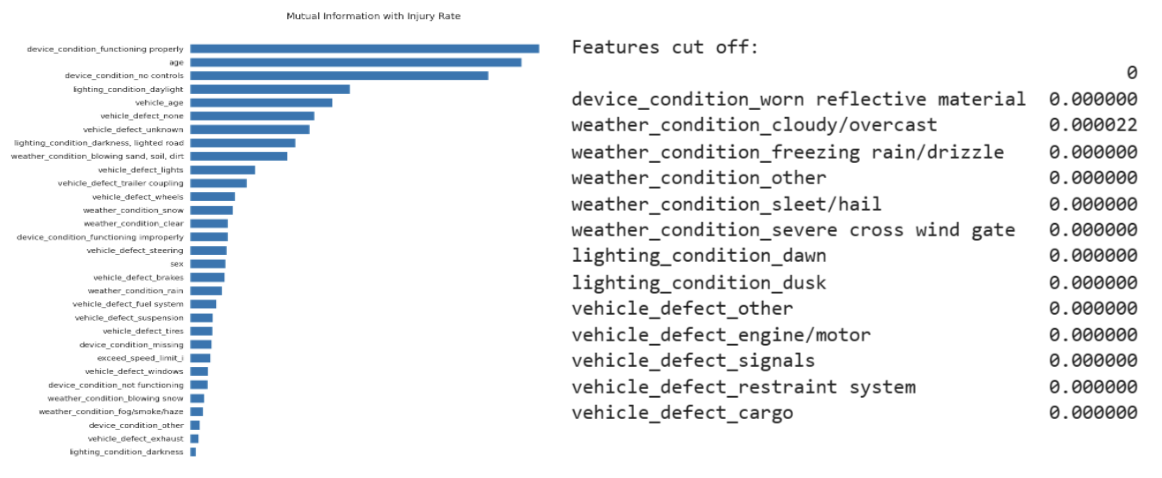

We decided to drop the variables where the mutual information with the target variable feature importance is less than 0.0001. These variables have limited importance in our model and hence for the sake of computation time and parsinomy, we only use variables whose feature importance is more than 0.0001 from the results above. Notice how the most important features have a level of information 50 times higher than the threshold we've used; since information entropy works on a logarithmic scale, this suggests that the low-information features are really almost irrelevant for the output.

Based on that to make further analysis more robust as well as increase speed of the analysis, we will use only features which made 0.0001 cut-off.

In [ ]:
#features_keep = final_mutual_info.index.values.tolist()
#features_keep
features_keep=['device_condition_functioning properly',
 'age',
 'device_condition_no controls',
 'lighting_condition_daylight',
 'vehicle_age',
 'vehicle_defect_none',
 'vehicle_defect_unknown',
 'lighting_condition_darkness, lighted road',
 'weather_condition_blowing sand, soil, dirt',
 'vehicle_defect_lights',
 'vehicle_defect_trailer coupling',
 'vehicle_defect_wheels',
 'weather_condition_snow',
 'weather_condition_clear',
 'device_condition_functioning improperly',
 'vehicle_defect_steering',
 'sex',
 'vehicle_defect_brakes',
 'weather_condition_rain',
 'vehicle_defect_fuel system',
 'vehicle_defect_suspension',
 'vehicle_defect_tires',
 'device_condition_missing',
 'exceed_speed_limit_i',
 'vehicle_defect_windows',
 'device_condition_not functioning',
 'weather_condition_blowing snow',
 'weather_condition_fog/smoke/haze',
 'device_condition_other',
 'vehicle_defect_exhaust',
 'lighting_condition_darkness']

With fewer features, we can also try to visualize a heatmap of pairwise correlations to identify conflations:

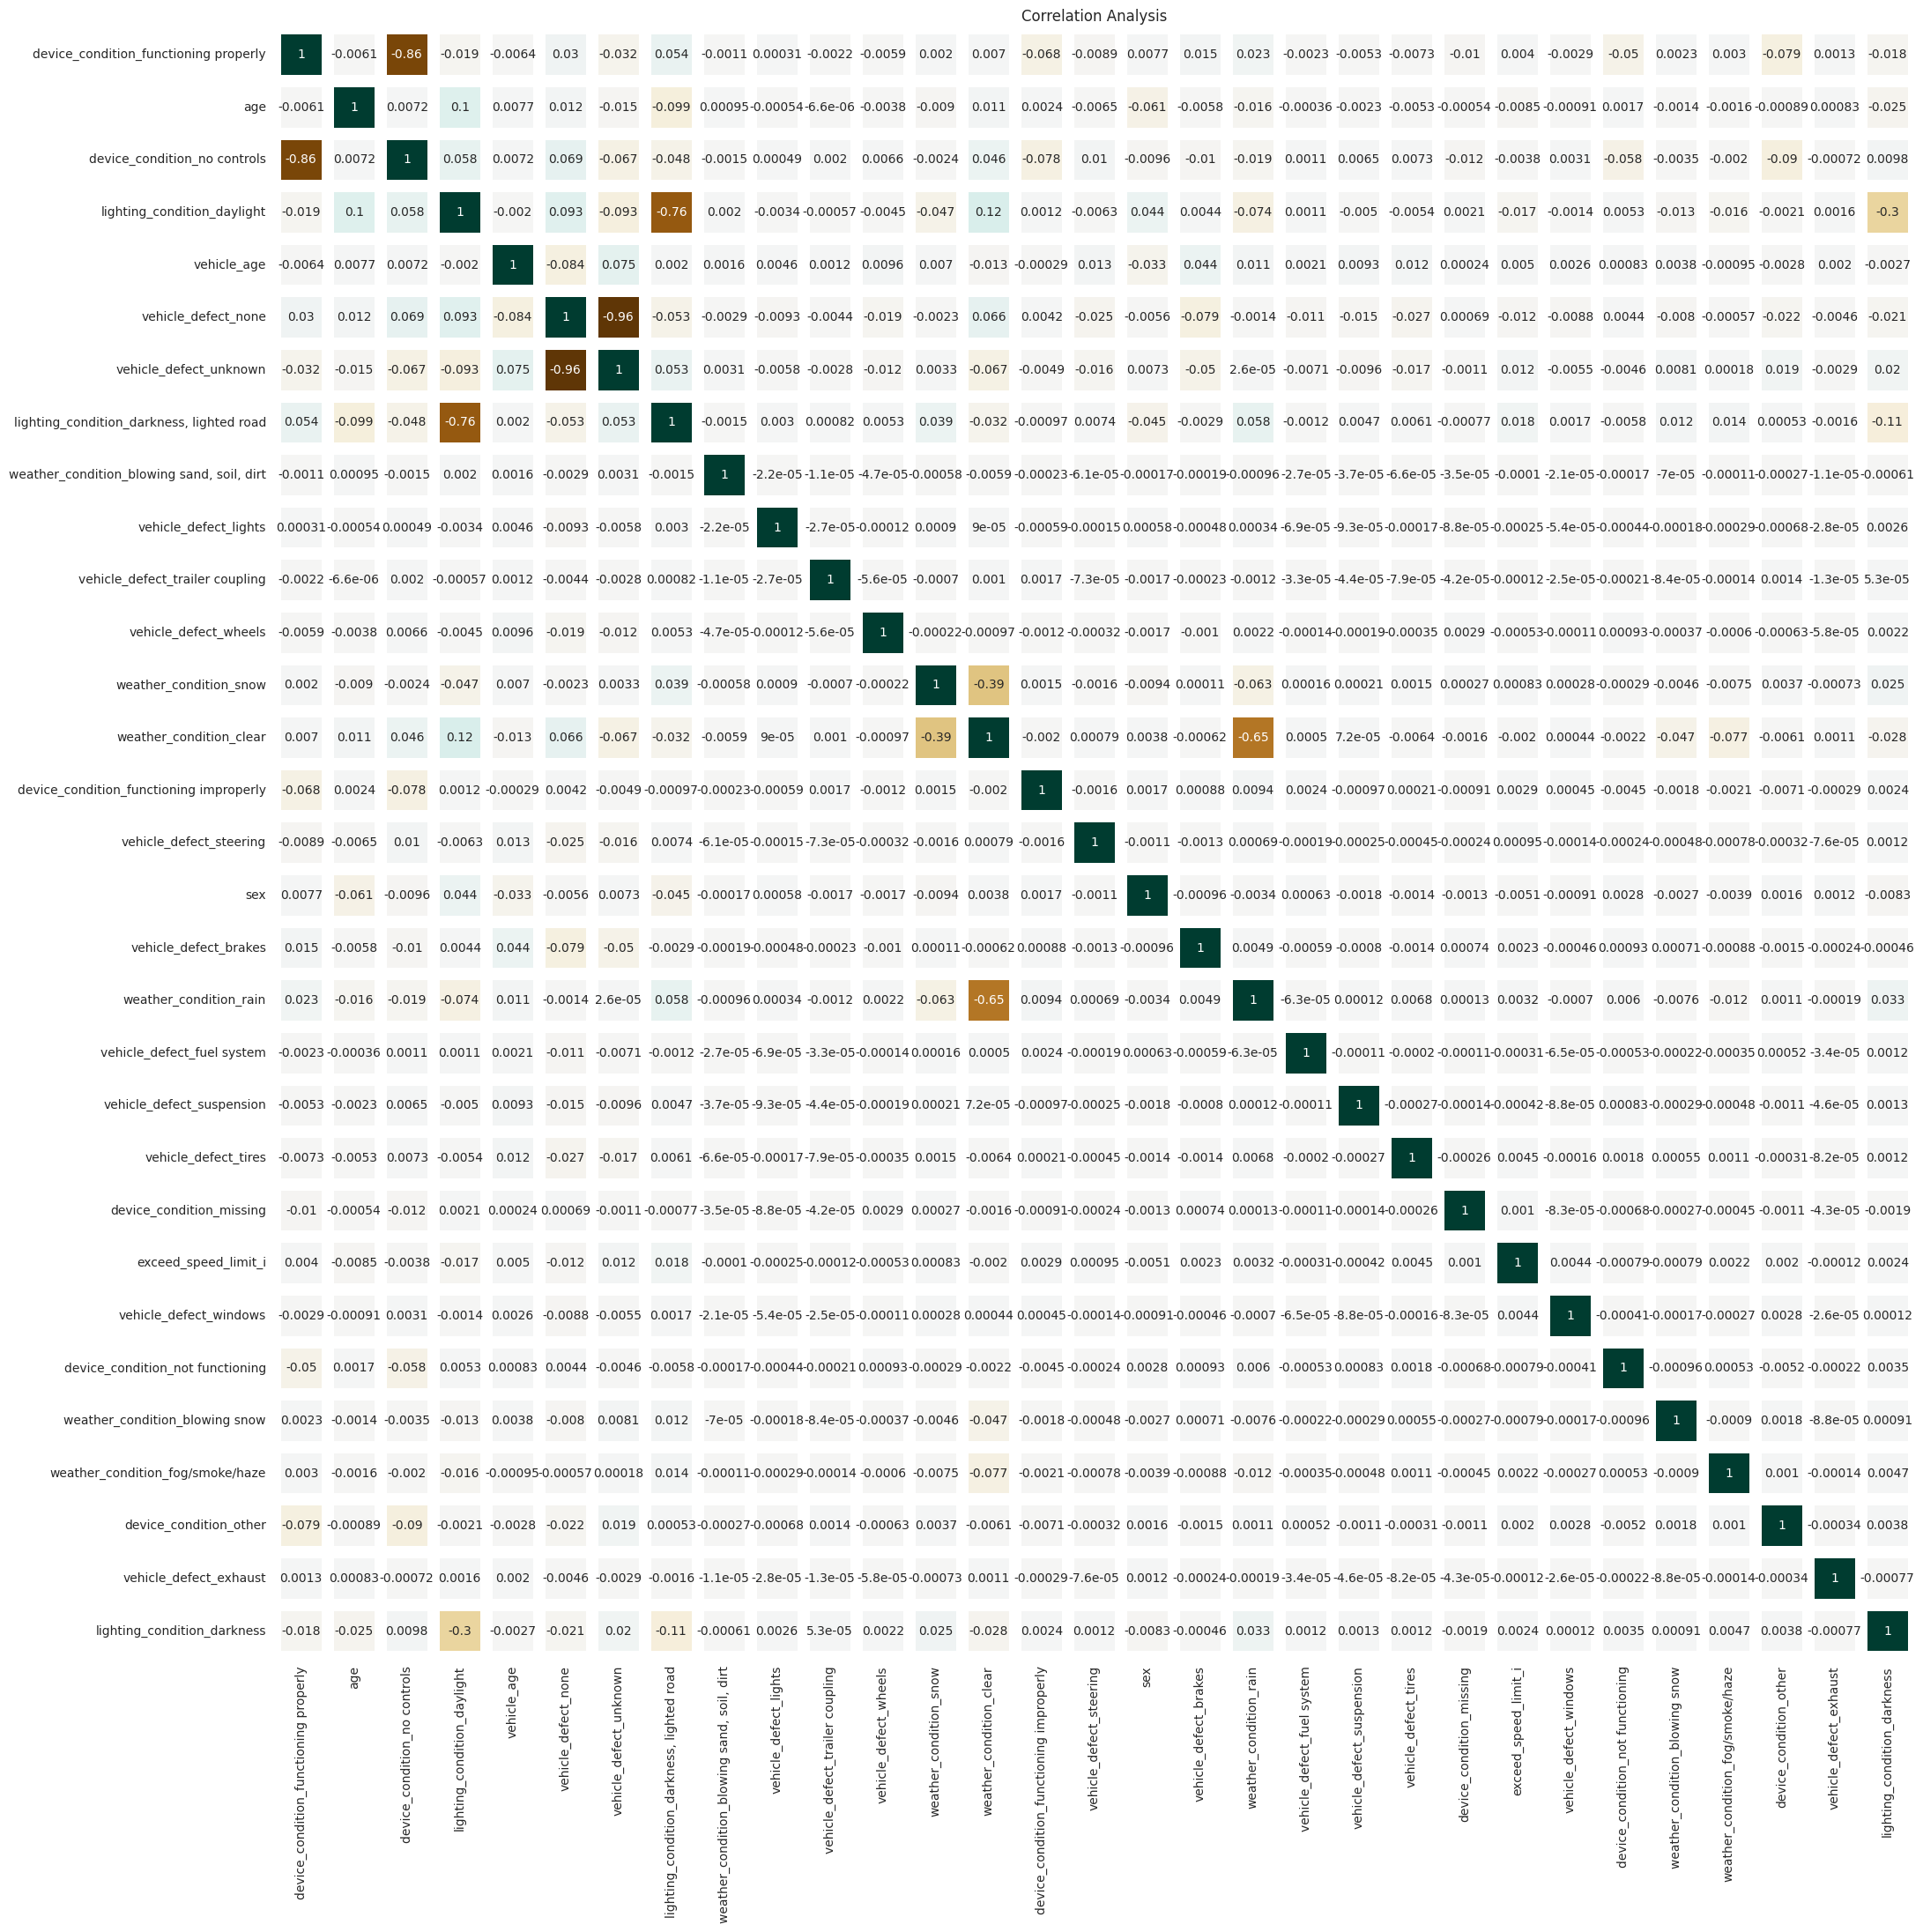

In [ ]:
corrs = df[features_keep].corr()
fig, ax = plt.subplots(figsize=(24,24))
sns.heatmap(corrs,cmap='BrBG',vmin=-1,vmax=1,cbar=False,annot=True,linewidths=10)
# add title
plt.title('Correlation Analysis');

As we can see, apart from some obvious results (such as a vehicle defect being negatively correlated with no vehicle defect), there isn't much conflation between the features. Now, we will use the features that we decided to keep and build machine learning models to see the influence of driver's gender on the weighted injury rate.

In [ ]:
# These were the list of features we decided to keep.

#features_keep = final_mutual_info.index.values.tolist()
#features_keep
features_keep=['device_condition_functioning properly',
 'age',
 'device_condition_no controls',
 'lighting_condition_daylight',
 'vehicle_age',
 'vehicle_defect_none',
 'vehicle_defect_unknown',
 'lighting_condition_darkness, lighted road',
 'weather_condition_blowing sand, soil, dirt',
 'vehicle_defect_lights',
 'vehicle_defect_trailer coupling',
 'vehicle_defect_wheels',
 'weather_condition_snow',
 'weather_condition_clear',
 'device_condition_functioning improperly',
 'vehicle_defect_steering',
 'sex',
 'vehicle_defect_brakes',
 'weather_condition_rain',
 'vehicle_defect_fuel system',
 'vehicle_defect_suspension',
 'vehicle_defect_tires',
 'device_condition_missing',
 'exceed_speed_limit_i',
 'vehicle_defect_windows',
 'device_condition_not functioning',
 'weather_condition_blowing snow',
 'weather_condition_fog/smoke/haze',
 'device_condition_other',
 'vehicle_defect_exhaust',
 'lighting_condition_darkness']

# Regression Models

In [ ]:
#uploading the file
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/final.csv",low_memory=False)

As our outcome variable `weighted_injury_rate` is continuous, we can run a regression model to predict it using the features we have. We split all the data into a train set and a test set. The goal is to make the best model to predict the weighted injury rate using all the features that we have specified as independent variables above. This optimal model can be used to predict the severity of injury of crashes which have real life application in government to provide timely support to the crash scene or insurance companies who want to predict the risk premium for certain age group or sex group.

Details of the model is as follows:

Independent Variables:
1. External Factors: Device condition, Weather, Lighting
2. Vehicle: Age, Defect, Speed Limit
3. People: Age, Sex

Dependent Variable: Weighted Injury Rate

Preprocessing data drops all rows that has NaN values, keeps the features using the mutual information as above and scales features using normalization.

In [ ]:
exfac_cols = ['device_condition_functioning properly','device_condition_no controls',\
              'device_condition_not functioning', 'device_condition_functioning improperly',\
              'device_condition_other','device_condition_missing', 'weather_condition_clear',\
              'weather_condition_snow', 'weather_condition_rain','weather_condition_fog/smoke/haze',\
              'weather_condition_blowing snow', 'weather_condition_blowing sand, soil, dirt',\
              'lighting_condition_daylight', 'lighting_condition_darkness, lighted road',\
              'lighting_condition_darkness']

vehicles_cols = ['vehicle_age', 'vehicle_defect_none',\
                 'vehicle_defect_unknown', 'vehicle_defect_brakes',\
                 'vehicle_defect_tires','vehicle_defect_suspension',\
                 'vehicle_defect_windows','vehicle_defect_lights',\
                 'vehicle_defect_wheels','vehicle_defect_steering',\
                 'vehicle_defect_fuel system','vehicle_defect_trailer coupling',\
                 'vehicle_defect_exhaust','exceed_speed_limit_i']

people_cols = ['age','sex']

df_reg = df[['weighted_injury_rate']+ exfac_cols + vehicles_cols + people_cols].dropna()

y = df_reg['weighted_injury_rate']
x = df_reg[exfac_cols + vehicles_cols + people_cols]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
# Scale features using normalization
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Linear Regression

The first model we tried is linear regression, which might not be the best model due to the number of datapoints but it is a good baseline model to compare the performances of other models.

In [ ]:
### Linear Regression
LR = LinearRegression()

param_grid = {
    'fit_intercept': [True, False]}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(LR, param_grid, cv=5)
grid_search.fit(x_train_scaled, y_train)

# Get the best hyperparameters and fit the model
best_params = grid_search.best_params_
best_LR = LinearRegression(**best_params)
best_LR.fit(x_train_scaled, y_train)
y_pred = best_LR.predict(x_test_scaled)

# Calculate metrics
linreg_mae = mean_absolute_error(y_test,y_pred)
linreg_mse = mean_squared_error(y_test,y_pred)
linreg_r2 = r2_score(y_test,y_pred)

print(f'Mean Absolute Error: {linreg_mae}.\
      \nMean Squared Error: {linreg_mse}.\
      \nR-squared Score: {linreg_r2}.')

Mean Absolute Error: 8.031030849776158.      
Mean Squared Error: 162.61305060301564.      
R-squared Score: 0.01632448617401605.


### Ridge Linear Regression

Ridge linear regression uses L2 regularization to avoid overfitting.
Ridge regression introduces a tuning parameter (alpha) to control the amount of regularization, which balances the model's ability to fit the training data with its ability to generalize to new data.
Ridge regression can handle multicollinearity, which occurs when two or more predictor variables are highly correlated.

In [ ]:
### Ridge Linear Regression
alphas = np.linspace(0.01,3,10)

# Initializing the instance of Ridge
ridge = Ridge()

# Setting parameter grid for grid search
param_grid = {'alpha': alphas}

# defining grid search with 5-fold cross validation
grid_search = GridSearchCV(ridge, param_grid, cv = 5)

# fitting the train
grid_search.fit(x_train_scaled, y_train)

# Printing the best set of parameters
print('Best parameters {}'.format(grid_search.best_params_))

# Finally we train our model on the optimal alpha

linear_ridge_optimal = Ridge(alpha=grid_search.best_params_['alpha'])
linear_ridge_optimal.fit(x_train_scaled, y_train)

# Predict on test set
y_pred = linear_ridge_optimal.predict(x_test_scaled)

# Calculate metrics
ridge_mae = mean_absolute_error(y_test,y_pred)
ridge_mse = mean_squared_error(y_test,y_pred)
ridge_r2 = r2_score(y_test,y_pred)

print(f'Mean Absolute Error: {ridge_mae}.\
      \nMean Squared Error: {ridge_mse}.\
      \nR-squared Score: {ridge_r2}.')

Best parameters {'alpha': 3.0}
Mean Absolute Error: 8.031071148240251.      
Mean Squared Error: 162.61285460529766.      
R-squared Score: 0.01632567179937172.


### Lasso Linear Regression

Lasso linear regression uses L1 regularization, which adds a penalty term to the cost function of linear regression. This penalty term encourages sparsity in the coefficients of the regression model, which means it shrinks some coefficients to zero.

The coefficient estimates of Lasso regression tend to be more robust to multicollinearity compared to simple linear regression. However, as tested in Milestone 2, our dataset does not have high degree of multicollinearity (vif value was approximately 1). Therefore, the metrics of Ridge and Lasso linear regression models did not improve significantly from the base linear regression model.

In [ ]:
### Lasso Linear Regression
alphas = np.linspace(0.01,1.5,5)

# Initializing the instance of Lasso
lasso = Lasso()

# Setting parameter grid for grid search
param_grid = {'alpha': alphas}

# defining grid search with 5-fold cross validation
grid_search = GridSearchCV(lasso, param_grid, cv = 5)

# fitting the train
grid_search.fit(x_train_scaled, y_train)

# Printing the best set of parameters
print('Best parameters {}'.format(grid_search.best_params_))

# Finally we train our model on the optimal alpha

linear_lasso_optimal = Lasso(alpha=grid_search.best_params_['alpha'])
linear_lasso_optimal.fit(x_train_scaled, y_train)

# Predict on test set
y_pred = linear_lasso_optimal.predict(x_test_scaled)

# Calculate metrics
lasso_mae = mean_absolute_error(y_test,y_pred)
lasso_mse = mean_squared_error(y_test,y_pred)
lasso_r2 = r2_score(y_test,y_pred)

print(f'Mean Absolute Error: {lasso_mae}.\
      \nMean Squared Error: {lasso_mse}.\
      \nR-squared Score: {lasso_r2}.')

Best parameters {'alpha': 0.01}
Mean Absolute Error: 8.05222366030545.      
Mean Squared Error: 162.80963239506278.      
R-squared Score: 0.015135327649631214.


### Linear SVM Regression

Linear SVM Regression finds the line that has the maximum margin (distance) from the closest data points and is more robust to outliers. While the R square is worse than linear regression, the MAE is significantly lower.

In [ ]:
### Linear SVM Regression
from sklearn.svm import LinearSVR

# Set the hyperparameters to tune
param_grid = {'C': [0.1, 1, 10]}

# Create an instance of the SVR model
svr = LinearSVR()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(svr, param_grid, cv=5)
grid_search.fit(x_train_scaled, y_train)

# Printing the best set of parameters
print('Best parameters {}'.format(grid_search.best_params_))

# Get the best hyperparameters and fit the model
best_params = grid_search.best_params_
best_svr = LinearSVR(**best_params)
best_svr.fit(x_train_scaled, y_train)
y_pred = best_svr.predict(x_test_scaled)

# Calculate metrics
svr_mae = mean_absolute_error(y_test, y_pred)
svr_mse = mean_squared_error(y_test, y_pred)
svr_r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {svr_mae}.\
      \nMean Squared Error: {svr_mse}.\
      \nR-squared Score: {svr_r2}.')

Best parameters {'C': 10}
Mean Absolute Error: 4.901504362068637.      
Mean Squared Error: 189.3338058449561.      
R-squared Score: -0.14531415565063144.


### Decision Tree Regression

Decision tree regression can model nonlinear relationships, but maybe because there are too many similar clusters in our dataset, the R-square is not as high as linear regression and the MAE and MSE are worse than linear regression.

In [ ]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

# Define the parameter grid to search over
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [5, 10]
}

# Create an instance of the decision tree regressor model
dt = DecisionTreeRegressor()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(x_train_scaled, y_train)

# Printing the best set of parameters
print('Best parameters {}'.format(grid_search.best_params_))

# Get the best hyperparameters and fit the model
best_params = grid_search.best_params_
best_dt = DecisionTreeRegressor(**best_params)
best_dt.fit(x_train_scaled, y_train)
y_pred = best_dt.predict(x_test_scaled)

# Calculate metrics
dt_mae = mean_absolute_error(y_test, y_pred)
dt_mse = mean_squared_error(y_test, y_pred)
dt_r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {dt_mae}.\
      \nMean Squared Error: {dt_mse}.\
      \nR-squared Score: {dt_r2}.')

Mean Absolute Error: 8.04050854406083.      
Mean Squared Error: 162.67717661329857.      
R-squared Score: 0.015936576434417926.


## Regression Model Performance Summary

The linear SVM regression model has the lowest mean absolute error (MAE) of 4.901, indicating that it has the best performance in predicting the target variable compared to the other models.

The R-squared (R2) scores are all very low, indicating that the models have poor performance in explaining the variability of the weighted injury rate. The linear SVM regression model has a negative R2 score, which indicates that the model fits the data worse than a horizontal line.

In conclusion, the linear SVM regression model has the best performance in predicting the weighted injury rate. So if we want to use the model just for predicting, we should use Linear SVM with the lowest MAE score. If we want to study the variability of the weighted injury rate, we should use linear ridge regression with highest R square.

In [ ]:
### Make a dataframe and report the metrics for 5 models
metrics_dict = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Linear SVM Regression', 'Decision Tree Regression'],
    'MAE': [linreg_mae, ridge_mae, lasso_mae, svr_mae, dt_mae],
    'MSE': [linreg_mse, ridge_mse, lasso_mse, svr_mse, dt_mse],
    'R2': [linreg_r2, ridge_r2, lasso_r2, svr_r2, dt_r2]
}
metrics = pd.DataFrame(metrics_dict).T
metrics

,0,1,2,3,4
Model,Linear Regression,Ridge Regression,Lasso Regression,Linear SVM Regression,Decision Tree Regression
MAE,8.031031,8.031071,8.052224,4.901446,8.040509
MSE,162.613051,162.612855,162.809632,189.328052,162.677177
R2,0.016324,0.016326,0.015135,-0.145279,0.015937


## Importance of driver's gender - Linear SVM Regression

To further study the feature importance of driver's gender, we will use Linear SVM model to compare the importance of gender with different set of control variables.

In [ ]:
# Model 1: gender and weighted injury rate
x1 = scaler.fit_transform(x[['sex']])
svm1 = LinearSVR(C=10).fit(x1, y)
importance1 = svm1.coef_
df_importance1 = pd.DataFrame({'Feature': ['sex'], 'Importance': importance1})

# Model 2: gender, sex, and weighted injury rate
x2 = scaler.fit_transform(x[['sex'] + exfac_cols])
svm2 = LinearSVR(C=10).fit(x2, y)
importance2 = svm2.coef_
df_importance2 = pd.DataFrame({'Feature': ['sex'] + exfac_cols, 'Importance': importance2})

# Model 3: people and vehicles_col and weighted injury rate
x3 = scaler.fit_transform(x[['sex'] + vehicles_cols + exfac_cols])
svm3 = LinearSVR(C=10).fit(x3, y)
importance3 = svm3.coef_
df_importance3 = pd.DataFrame({'Feature': ['sex'] + exfac_cols + vehicles_cols, 'Importance': importance3})

# Model 4: exfac_cols, vehicles_cols, people_cols, and weighted injury rate
x4 = scaler.fit_transform(x[['sex'] + exfac_cols + vehicles_cols + ['age']])
svm4 = LinearSVR(C=10).fit(x4, y)
importance4 = svm4.coef_
df_importance4 = pd.DataFrame({'Feature': ['sex'] + exfac_cols + vehicles_cols + ['age'], 'Importance': importance4})

In [ ]:
df_all = pd.merge(df_importance1, df_importance2, on='Feature', how='outer', suffixes=('_1', '_2'))
df_all = pd.merge(df_all, df_importance3, on='Feature', how='outer')
df_all = pd.merge(df_all, df_importance4, on='Feature', how='outer', suffixes=('_3', '_4'))

df_all

,Feature,Importance_1,Importance_2,Importance_3,Importance_4
0,sex,1.522140e-12,3.570802e-09,-3.240841e-06,-0.000037
1,device_condition_functioning properly,NaN,1.688639e-08,1.417907e-06,0.000531
2,device_condition_no controls,NaN,1.574226e-08,9.574031e-07,0.000574
3,device_condition_not functioning,NaN,-5.709460e-09,4.278603e-07,0.006540
4,device_condition_functioning improperly,NaN,-3.025176e-09,5.353746e-07,0.002383
5,device_condition_other,NaN,8.332149e-08,7.439285e-07,0.000521
6,device_condition_missing,NaN,-2.930051e-07,2.670392e-06,-0.000094
7,weather_condition_clear,NaN,-1.155552e-08,-4.160421e-07,0.000155
8,weather_condition_snow,NaN,-2.312108e-08,-2.148397e-07,-0.000033
9,weather_condition_rain,NaN,-1.078172e-08,2.729084e-06,-0.000301


We also test the statistical significance of all the independent variables through linear regression and report the summary statistics for all models as below.

In [ ]:
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from statsmodels.stats.outliers_influence import variance_inflation_factor

### OLS 1: Without control variables ###
x1 = sm.add_constant(x1)
model1 = sm.OLS(y, x1)
result1 = model1.fit()
result1.model.exog_names[1] = 'sex'

### OLS 2: With external factors as control variables ###
x2 = sm.add_constant(x2)
model2 = sm.OLS(y, x2)
result2 = model2.fit()
result2.model.exog_names[1:] = ['sex'] + exfac_cols

### OLS 3: With external factors and vehicles as control variables ###
x3 = sm.add_constant(x3)
model3 = sm.OLS(y, x3)
result3 = model3.fit()
result3.model.exog_names[1:] = ['sex'] + exfac_cols + vehicles_cols

### OLS 4: With external factors, vehicles, and drivers' age as control variables ###
x4 = sm.add_constant(x4)
model4 = sm.OLS(y, x4)
result4 = model4.fit() # with robust SE
result4.model.exog_names[1:] = ['sex'] + exfac_cols + vehicles_cols + ['age']

In [ ]:
# Combine the summary tables for the 4 models into a single table
summary_table = summary_col([result1, result2, result3, result4],
                            model_names=['(1)\n Without CVs',
                                         '(2)\n External',
                                         '(3)\n External, Vehicles',
                                         '(4)\n External, Vehicles, Drivers'],
                            float_format='%0.4f',
                            stars=True,
                            regressor_order=['sex'] + exfac_cols + vehicles_cols + ['age'])

# Print the combined summary table
print(summary_table)


                                               (1)         (2)             (3)                     (4)             
                                            Without CVs  External   External, Vehicles  External, Vehicles, Drivers
-------------------------------------------------------------------------------------------------------------------
sex                                        0.1323***    0.2063***  0.2389***           0.2193***                   
                                           (0.0206)     (0.0206)   (0.0205)            (0.0206)                    
device_condition_functioning properly                   1.7245***  9.9541***           2.3203***                   
                                                        (0.0475)   (0.2118)            (0.0483)                    
device_condition_no controls                            -0.0502    -0.9190***          0.5542***                   
                                                        (0.0472)   (0.1

# Classification Models
Based on the performance of regression models, the decision to try to predict whether a crash involved injury or not was made. To do this, various classification models were chosen.

In [ ]:
#downloading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, accuracy_score
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import mutual_info_regression

In [ ]:
#reading the dataset
from google.colab import drive
drive.mount('/content/drive')
# input_path="/content/drive/My Drive/Colab Notebooks/" #Indira
# input_path= '/content/drive/MyDrive/EY 2022-2023 Junior/Spring 2023/SOCSC-UH 2214 Applied Data Science/project/m3/' #Ashley
# input_path = '/content/drive/My Drive/Junior Spring/Applied Data Science/Project/' #Alex
# input_path = '/content/drive/MyDrive/Applied Data Science/Project/' #Antonio

# load the final dataset
df = pd.read_csv(input_path + "final.csv",low_memory=False)


print(df.shape)
df.head()

In [ ]:
#identify features for further analysis
features_keep=['device_condition_functioning properly',
 'age',
 'device_condition_no controls',
 'lighting_condition_daylight',
 'vehicle_age',
 'vehicle_defect_none',
 'vehicle_defect_unknown',
 'lighting_condition_darkness, lighted road',
 'weather_condition_blowing sand, soil, dirt',
 'vehicle_defect_lights',
 'vehicle_defect_trailer coupling',
 'vehicle_defect_wheels',
 'weather_condition_snow',
 'weather_condition_clear',
 'device_condition_functioning improperly',
 'vehicle_defect_steering',
 'sex',
 'vehicle_defect_brakes',
 'weather_condition_rain',
 'vehicle_defect_fuel system',
 'vehicle_defect_suspension',
 'vehicle_defect_tires',
 'device_condition_missing',
 'exceed_speed_limit_i',
 'vehicle_defect_windows',
 'device_condition_not functioning',
 'weather_condition_blowing snow',
 'weather_condition_fog/smoke/haze',
 'device_condition_other',
 'vehicle_defect_exhaust',
 'lighting_condition_darkness']

The regression model above showed gender as a feature influences predictions of injury rate. Recall that the outcome variable `weighted_injury_rate` in our dataset includes a lot of 0 values, meaning that there are a lot of crashes that ended in no injuries at all. Using this, we will next build a classification model to predict whether a car crash results in any injuries or not and how gender plays a role here. Below is a quick analysis of the proportion of crashes with no injuries.

In [ ]:
injury_noinjury = df['weighted_injury_rate'] > 0
injury_ratio = injury_noinjury.value_counts(normalize = True)

# Plot as a pie chart
fig, ax = plt.subplots(1, 1, figsize = (4, 2))
ax.pie(injury_ratio, labels = ["No injury", "At least 1 injury"], colors =["#a6a1cc", "#f8dbc4"], startangle=90, autopct='%1.1f%%', textprops={'fontsize': "small", 'alpha': 0.7})
plt.title("Proportion of Crashes with Injuryes/ No Injuries", alpha=0.7, fontsize="medium");

As 83.1% of the crashes in our dataset resulted in no injuries, we have enough instances to build a binary classification model to predict whether a car crash will result in any injuries or not. We start by dividing the instances into those that resulted in injuries (coded '1') and those that did not (coded '0'). any_injuries is the column reflecting this information.

In [ ]:
# make any_injuries column
df['any_injuries'] = np.where(df['weighted_injury_rate']>0, 1, 0)

# check that the distribution of 0 and 1 is the same as the pie chart above
df['any_injuries'].value_counts(normalize = True) # It is the same!

We start by creating another dataframe df_class which contains only the columns needed for Classification.

In [ ]:
# List of features
exfac_cols = ['device_condition_functioning properly', 'device_condition_no controls',
       'device_condition_not functioning',
       'device_condition_functioning improperly', 'device_condition_other',
       'device_condition_missing',
       'lighting_condition_daylight',
       'lighting_condition_darkness, lighted road',
       'lighting_condition_darkness']
weather_cols=['weather_condition_clear', 'weather_condition_cloudy/overcast',
       'weather_condition_snow', 'weather_condition_rain',
       'weather_condition_fog/smoke/haze',
       'weather_condition_blowing snow',
       'weather_condition_blowing sand, soil, dirt']

vehicles_cols = ['vehicle_age', 'vehicle_defect_none',
       'vehicle_defect_unknown', 'vehicle_defect_brakes',
       'vehicle_defect_tires',
       'vehicle_defect_suspension', 'vehicle_defect_windows',
       'vehicle_defect_lights', 'vehicle_defect_wheels',
       'vehicle_defect_steering', 'vehicle_defect_fuel system',
       'vehicle_defect_trailer coupling', 'vehicle_defect_exhaust',
       'exceed_speed_limit_i']

people_cols = ['age','sex']

# vehicle_age variable has many NaNs. We impute with median, because it is skewed
df['vehicle_age'].fillna(df['vehicle_age'].median(), inplace= True)

# Make a dataframe with only the variables we need for classification
df_class = df[['any_injuries']+ exfac_cols + vehicles_cols +weather_cols + people_cols].dropna()

The dataset is strongly skewed for classification models with the majority of observations being 0. That is why we used the balanced sample to make the analysis more robust.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Extract the target variable and feature variables
y = df_class['any_injuries']
X = df_class.drop(['any_injuries'], axis=1)

# Combine X and y into a single dataframe
df_combined = pd.concat([X, y], axis=1)

# Perform random undersampling to achieve equal class distribution
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Check the class distribution
print("Class distribution:")
print("Class 0:", sum(y_resampled == 0))
print("Class 1:", sum(y_resampled == 1))

## Linear SVM Classification

First, we try the Linear Support Vector Machine classification model with the same features to predict `any_injuries`. We conduct a 3-fold cross validation grid search with different `C` parameters to find the degree of L2 regularization that provides the best model.

In [ ]:
#splittinhg the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
# This takes 1hr 30min to run

c_params = {'C': [0.1, 1, 5]}

svm= LinearSVC()
svm_grid = GridSearchCV(estimator= svm, param_grid = c_params, cv=3)
svm_grid.fit(X_train, y_train)


print('Best parameters {}'.format(svm_grid.best_params_))
print('Best score {}'.format(svm_grid.best_score_))

pd.DataFrame(svm_grid.cv_results_)

Run locally in another computer, the above printed the following outcome:
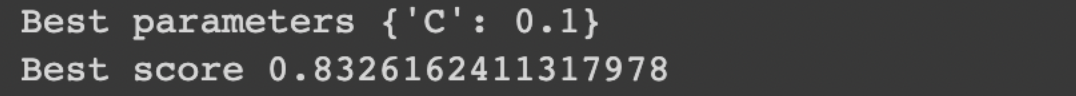

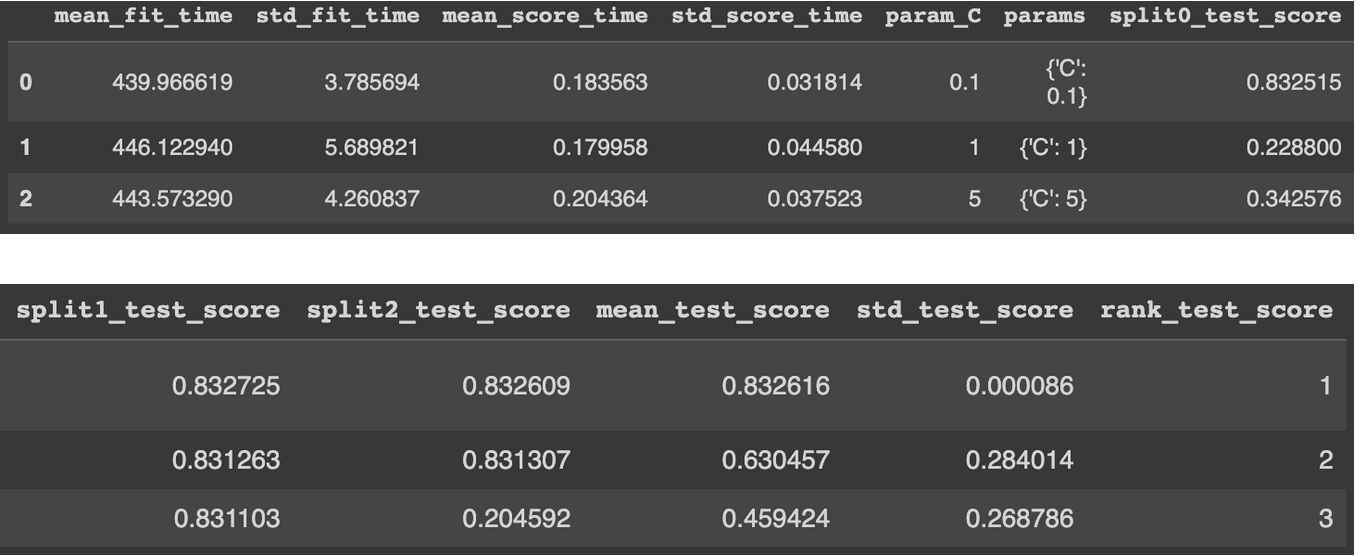

From the GridSearch results, we can see that C=0.1 was chosen to be the best parameter. It had a much higher mean test score than the other parameters and also the lowest standard deviation in the test score. Hence, we can confidently use 0.1 as the C parameter in the model.

In [ ]:
# Build a Linear SVM Classification model using the best parameters found by GridSearch
svmclas = LinearSVC(C= 0.1)
svmclas.fit(X_train, y_train)

y_pred= svmclas.predict(X_test)

In [ ]:
svm_prec = precision_score(y_pred, y_test)
svm_recall = recall_score(y_pred, y_test)
svm_auc = roc_auc_score(y_pred, y_test)
svm_acc= svmclas.score(X_test, y_test)

print('Test Precision {}'.format(svm_prec))
print('Test Recall {}'.format(svm_recall))
print('Test AUC-ROC {}'.format(svm_auc))
print('Test Accuracy {}'.format(svm_acc))

## Logistic Regression
We also tried logistic regression for classification. Logistic Regression is appropriate for binary classification problems, such as predicting whether a crash had an injury or not. This algorithm is well-suited for situations where the target variable is binary and the features are continuous or categorical. Logistic regression also provides interpretable coefficients, which allow us to understand the relationship between the predictor variables and the outcome.

In [ ]:
#resamplinhg and splitting the data
#First for logistic regression we need to split the data and make sure that the split on injuries and not injurues is the same across train and test
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Extract the target variable and feature variables
y = df_class['any_injuries']
X = df_class.drop(['any_injuries'], axis=1)

# Combine X and y into a single dataframe
df_combined = pd.concat([X, y], axis=1)

# Perform random undersampling to achieve equal class distribution
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=0, test_size=0.2)

# Feature scaling with normalization
scaler1=MinMaxScaler()  #age and vehcile age are not normally distributed

cont=['vehicle_age', 'age']
binary=[i for i in features_keep if i not in cont]

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_normal = pd.DataFrame(scaler1.fit_transform(X_train[cont]), columns=cont).reset_index(drop=True)
X_train_binary=pd.DataFrame((X_train[binary]), columns=binary).reset_index(drop=True)
X_train_scaled = pd.concat([X_train_normal, X_train_binary], axis=1).reset_index(drop=True)

X_test_normal = pd.DataFrame(scaler1.transform(X_test[cont]), columns=cont).reset_index(drop=True)
X_test_binary=pd.DataFrame((X_test[binary]), columns=binary).reset_index(drop=True)
X_test_scaled = pd.concat([X_test_normal, X_test_binary], axis=1).reset_index(drop=True)

In [ ]:
# Making logistic regression
from sklearn.metrics import accuracy_score, r2_score

def model_logit(x_train, y_train, x_test, y_test):
    C_range = [0.01, 0.1, 1, 10]  # range of C parameters to try in GridSearch
    param_grid = {"C": C_range}

    logreg = LogisticRegression(penalty="l2", max_iter=1000)  #we use l2 because best features are already selected
    logreg_cv = GridSearchCV(param_grid=param_grid, estimator=logreg, cv=3, scoring="accuracy")
    logreg_cv.fit(X_train, y_train)

    y_pred=logreg_cv.predict(X_test)

    print(logreg_cv.best_params_)

    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

print(model_logit(X_train_scaled, y_train, X_test_scaled,y_test))

The GridSearch results in the following when run locally in another computer: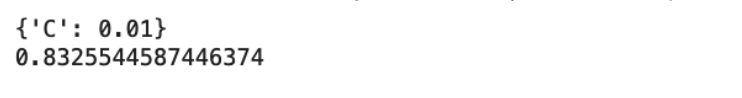

In [ ]:
logreg = LogisticRegression(penalty="l2", max_iter=1000, C=0.01)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [ ]:
logreg_prec = precision_score(y_pred, y_test)
logreg_recall = recall_score(y_pred, y_test)
logreg_auc = roc_auc_score(y_pred, y_test)
logreg_acc= logreg.score(X_test, y_test)

print('Test Precision {}'.format(logreg_prec))
print('Test Recall {}'.format(logreg_recall))
print('Test AUC-ROC {}'.format(logreg_auc))
print('Test Accuracy {}'.format(logreg_acc))

After assessing the accuracy of the model, it is also useful to look at coefficients in the logit regression. Based on this regression, sex has positive influence on the probability of getting injured in a crash.

In [ ]:
coefficients = logreg.coef_.tolist()[0]
feature_names = X_train.columns.tolist()
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coefficients_df

Here, we see that the coefficient of `sex` is 0.059. This means that value of 1 in `sex` (i.e. female drivers), are 5.9% more likely than non-female drivers to cause injuries in a car crash.

## Decision Tree
Next, we try a decision tree classifier. A decision tree classifier is a simple yet powerful algorithm to predict whether there was an injury or not. It is a non-parametric algorithm, which means that it does not require assumptions about the distribution of the data. This makes it suitable for our dataset in which each feature has different levels of correlation with the outcome and have different distributions. Additionally, decision trees can easily handle both categorical and numerical data, making it suitable for a wide range of problems. On the downside, we cannot actually interpret the coefficients.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Extract the target variable and feature variables
y = df_class['any_injuries']
X = df_class.drop(['any_injuries'], axis=1)

# Combine X and y into a single dataframe
df_combined = pd.concat([X, y], axis=1)

# Perform random undersampling to achieve equal class distribution
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=0, test_size=0.2)

In [ ]:
#Finding best parameters for the model
from sklearn.tree import DecisionTreeClassifier
param_grid = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

# 3-fold Cross Validation GridSearch to find the best max_depth parameter
clf = DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# print the best value for max_depth and the corresponding score
print('Best max_depth:', grid_search.best_params_['max_depth'])
print('Best score:', grid_search.best_score_)

When run locally on another computer, the grid search result is as below:
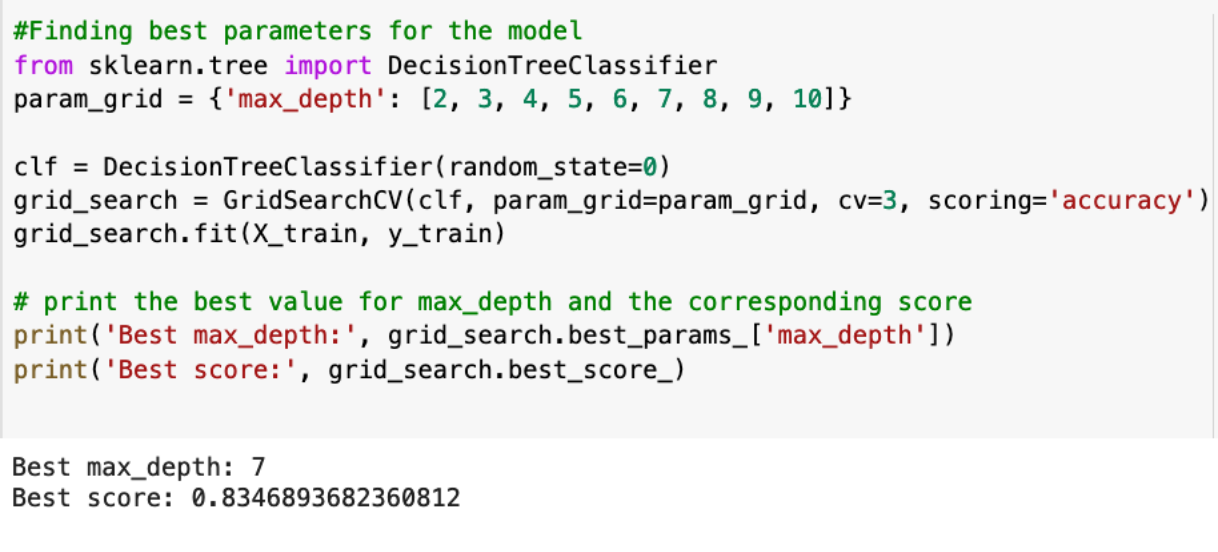

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth= 7, random_state=0)
dt.fit(X_train, y_train)

y_pred=dt.predict(X_test)

In [ ]:
dt_prec = precision_score(y_pred, y_test)
dt_recall = recall_score(y_pred, y_test)
dt_auc = roc_auc_score(y_pred, y_test)
dt_acc= dt.score(X_test, y_test)

print('Test Precision {}'.format(dt_prec))
print('Test Recall {}'.format(dt_recall))
print('Test AUC-ROC {}'.format(dt_auc))
print('Test Accuracy {}'.format(dt_acc))

## Random Forest Classifier
Adding onto the Decision Tree Classification, the Random Forest Classifier can also be a useful algorithm to classify whether a crash involved injury or not due to its ability to handle large datasets with high dimensionality and noisy features. The model also has a low risk of overfitting and can provide feature importance scores, which can aid in understanding the most significant predictors of injury in a crash. Additionally, the ensemble nature of Random Forest Classifier can result in improved accuracy compared to decision trees.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Extract the target variable and feature variables
y = df_class['any_injuries']
X = df_class.drop(['any_injuries'], axis=1)

# Combine X and y into a single dataframe
df_combined = pd.concat([X, y], axis=1)

# Perform random undersampling to achieve equal class distribution
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=0, test_size=0.2)

In [ ]:
#Training model and reporting metrics
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_features = 8, random_state = 0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [ ]:
clf_prec = precision_score(y_pred, y_test)
clf_recall = recall_score(y_pred, y_test)
clf_auc = roc_auc_score(y_pred, y_test)
clf_acc= clf.score(X_test, y_test)

print('Test Precision {}'.format(clf_prec))
print('Test Recall {}'.format(clf_recall))
print('Test AUC-ROC {}'.format(clf_auc))
print('Test Accuracy {}'.format(clf_acc))

## Classification Model Performance Summary
To sum up the previous classification models that we ran, each with their best parameters identified through GridSearch, we provide the dataframe below, summarizing the evaluation metrics.

In [ ]:
metrics_dict = {
    'Classifier Model': ['Linear SVM', 'Logistic', 'Decision Tree', 'Random Forest'],
    'Accuracy': [svm_acc, logreg_acc, dt_acc, clf_acc],
    'Precision': [svm_prec, logreg_prec, dt_prec, clf_prec],
    'Recall': [svm_recall, logreg_recall, dt_recall, clf_recall],
    'AUC ROC': [svm_auc, logreg_auc, dt_auc, clf_auc]
}

metrics = pd.DataFrame(metrics_dict)
metrics

In [ ]:
# Make bar plots to visually compare the metrics
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize= (15, 4))
ax_ls = [ax1, ax2, ax3, ax4]

for n in range(len(ax_ls)):

  sns.barplot(ax = ax_ls[n], data=metrics, x= 'Classifier Model', y= list(metrics.columns)[n+1], color="#29387a", width=0.3, alpha=0.7)
  ax_ls[n].set_title(list(metrics.columns)[n+1], fontsize="medium")
  ax_ls[n].set_xticklabels(labels=['Linear SVM', 'Logistic', 'Decision Tree', 'Random Forest'], rotation=45)
  ax_ls[n].set_xlabel("")
  ax_ls[n].set_ylabel("")

sns.despine(fig)
fig.tight_layout(pad=1.0);

Based on the metrics shown above, it seems like the Decision Tree Classification model is the most appropriate. It has the highest accuracy, recall, and AUC ROC value. Therefore, we look at the effect of gender on this model. To do this, we build different "versions" of the Decision Tree classifier. We use the previous groupings of features to external factors, weather-related factors, vehicle-related factors and driver-related factors to try different combinations of these groups as features in the classification model. Our aim is to see the change in the behavior of the `sex` variable when we change which features are included/ excluded in the model.

## Importance of driver's gender - Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier

sex= ['sex']
external= [j for j in features_keep if j in exfac_cols]
external_sex= [j for j in features_keep if j in exfac_cols] + sex
weather = [i for i in features_keep if i in weather_cols]
weather_sex = [i for i in features_keep if i in weather_cols] + sex
vehicles= [k for k in features_keep if k in vehicles_cols]
vehicles_sex=[ k for k in features_keep if k in vehicles_cols] + sex

person= ['age']
person_sex= ['age'] + sex

everything = external + weather + vehicles+person
everything_sex= everything + sex

list_classifiers= [everything, everything_sex, sex, external, external_sex, weather, weather_sex, vehicles, vehicles_sex, person, person_sex]

# DataFrame to report the metrics
results_df = pd.DataFrame()

# run different Decision Tree models
for i in list_classifiers:
    if i == sex:
        feature_name = 'Female'
    elif i == external:
        feature_name = 'External Factors'
    elif i == external_sex:
        feature_name = 'Female and External Factors'
    elif i == weather:
        feature_name = 'Weather Factors'
    elif i == weather_sex:
        feature_name = 'Female and Weather Factors'
    elif i == vehicles:
        feature_name = 'Vehicle Factors'
    elif i == vehicles_sex:
        feature_name = 'Female and Vehicle Factors'
    elif i == person:
        feature_name = 'Age'
    elif i == person_sex:
        feature_name = 'Female and Age'
    elif i==everything:
        feature_name = 'External, Weather, Vehicle Factors, and Age'
    elif i==everything_sex:
        feature_name = 'Female, External, Weather, Vehicle Factors, and Age'

    # define the X and y for each model

    y = df_class['any_injuries']
    X = df_class[i]

    # Combine X and y into a single dataframe
    df_combined = pd.concat([X, y], axis=1)

    # Perform random undersampling to achieve equal class distribution
    rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
    X_resampled, y_resampled = rus.fit_resample(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=0)

    # Build a Decision tree classifier
    dt=DecisionTreeClassifier(max_depth= 7, random_state=0)
    dt.fit(X_train, y_train)

    # Predict for test set
    y_pred=dt.predict(X_test)

    # Report metrics
    dt_accuracy = accuracy_score(y_test, y_pred)
    dt_recall = recall_score(y_test,y_pred)
    dt_auc = roc_auc_score(y_test,y_pred)
    dt_prec = precision_score(y_test, y_pred)

    # Report the evaluation metrics
    results_df = results_df.append({'Features': feature_name, 'Accuracy': dt_accuracy, 'Precision': dt_prec, 'Recall': dt_recall, 'AUC ROC': dt_auc}, ignore_index=True)

From the dataframe above, we can compare pairs consisting of a model with certain features and another model with the same features along with `sex`. Including the `sex` variable generally increases accuracy, albeit by a very small value of 0.000002. However, considering that the dataset is huge, an increase of 0.000002 in accuracy might mean correctly predicting a lot more car crashes in numbers. Hence, `sex` seems to be an influential factor in this prediction.

Moreover, to assess the role of gender for the predicting whether crash involves injury or not, we do logistic regression and interpret the coefficients.

In [ ]:
sex=['sex']
external=[j for j in features_keep if j in exfac_cols]+sex
weather = [i for i in features_keep if i in weather_cols]+external
vehicles=[k for k in features_keep if k in vehicles_cols]+weather
person=['age']+vehicles

list_classifiers=[sex, external, weather, vehicles, person]

# Dataframe to report the evaluation metrics
results_df2= pd.DataFrame()

# Find coefficients from different Logistic Regression models
for i in list_classifiers:

      # Define X and y
      y = df_class['any_injuries']
      X = df_class[i]

      # Combine X and y into a single dataframe
      df_combined = pd.concat([X, y], axis=1)

      # Perform random undersampling to achieve equal class distribution
      rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
      X_resampled, y_resampled = rus.fit_resample(X, y)
      X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=0)

      if i=="vehicles":
        cont=['vehicle_age']
        binary=[i for i in features_keep if i not in cont]
        x_train_scaled = x_train.copy()
        x_test_scaled = x_test.copy()
        x_train_normal = pd.DataFrame(scaler1.fit_transform(x_train[cont]), columns=cont).reset_index(drop=True)
        x_train_binary=pd.DataFrame((x_train[binary]), columns=binary).reset_index(drop=True)
        x_train_scaled = pd.concat([x_train_normal, x_train_binary], axis=1).reset_index(drop=True)
        x_test_normal = pd.DataFrame(scaler1.transform(x_test[cont]), columns=cont).reset_index(drop=True)
        x_test_binary=pd.DataFrame((x_test[binary]), columns=binary).reset_index(drop=True)
        x_test_scaled = pd.concat([x_test_normal, x_test_binary], axis=1).reset_index(drop=True)
        X_train=x_train_scaled
        X_test=x_test_scaled
      elif i=="person":
        cont=['vehicle_age', 'age']
        binary=[i for i in features_keep if i not in cont]
        x_train_scaled = x_train.copy()
        x_test_scaled = x_test.copy()
        x_train_normal = pd.DataFrame(scaler1.fit_transform(x_train[cont]), columns=cont).reset_index(drop=True)
        x_train_binary=pd.DataFrame((x_train[binary]), columns=binary).reset_index(drop=True)
        x_train_scaled = pd.concat([x_train_normal, x_train_binary], axis=1).reset_index(drop=True)
        x_test_normal = pd.DataFrame(scaler1.transform(x_test[cont]), columns=cont).reset_index(drop=True)
        x_test_binary=pd.DataFrame((x_test[binary]), columns=binary).reset_index(drop=True)
        x_test_scaled = pd.concat([x_test_normal, x_test_binary], axis=1).reset_index(drop=True)
        X_train=x_train_scaled
        X_test=x_test_scaled
      else:
        X_train=X_train
        X_test=X_test

      # Build logistic regression models
      logreg = LogisticRegression(penalty="l2", max_iter=1000, C=0.01)
      logreg.fit(X_train, y_train)

      # extract coefficient for sex feature
      sex_coefficient = logreg.coef_[0][0]

      # Predict
      y_pred=logreg.predict(X_test)

      # Evaluation metrics
      lr_accuracy = accuracy_score(y_test, y_pred)
      lr_recall = recall_score(y_test,y_pred)
      lr_auc = roc_auc_score(y_test,y_pred)
      lr_prec = precision_score(y_test, y_pred)

      feature_name = ', '.join(i)

      # Report metrics
      results_df2 = results_df2.append({'Feature': feature_name, 'Coefficient': sex_coefficient, 'Accuracy': lr_accuracy, 'Precision': lr_prec, 'Recall': lr_recall, 'AUC ROC': lr_auc}, ignore_index=True)

# add Feature column values
results_df2.loc[0, 'Feature'] = 'Female'
results_df2.loc[1, 'Feature'] = 'Female and External Factors'
results_df2.loc[2, 'Feature'] = 'Female, External and Weather Factors'
results_df2.loc[3, 'Feature'] = 'Female, External, Weather and Vehicle Factors'
results_df2.loc[4, 'Feature'] = 'Female, External, Weather, Vehicle Factors and Age'



In [ ]:
results_df2

Here, we have 5 versions of the logistic regression model. Among these, we choose the fourth model with Female, External, Weather and Vehicle factors as features. This model has the highest accuracy, precision, recall and AUC ROC, so we can reliably say that this model is the best predictor. The coefficient of `sex` in this model is a positive value of 0.015973, so we can say that `sex` has a positive effect on causing injuries in a car crash.

# Conclusion

## Limitations

Our dataset is quite skewed, as the majority of crashes did not involve injuries
It is possible, as a result, that the dataset is not suited to predict the severity of injury resulting from a car crash. Moreover, `weighted_injury_rate` is a self-constructed measure as we generated the variable using other variables in the dataset. Hence, the fact that we could not obtain very significant results for regression suggests the variable may not be suitable for making predictions based on the features we have. Moreover, it is possible that important features were overlooked in the analysis stage, since the dataset is skewed. The machine learning analyses were conducted after a feature selection phase, so some variables that influence injury rate may have been omitted in the machine learning models or were not part of the dataset to begin with. Finally, we only examine car crashes in Chicago, so the results might not be generalizable to all car crashes


## Conclusion

Nonetheless, we were able to draw some meaningful conclusions. The regression model did not perform well in general. This perhaps show that the dataset we used is not well-suited to predicting the severity of injuries caused in a car crash, or the `weighted_injury_rate` that we had constructed is not the ideal dependent variable.

However, the classification model performed much better. This suggests that the datset is still useful in predicting the presence or absence of an injury in car crashes.

From the analyses, we found that driver's gender helps to classify whether there will be an injury or not in a car crash. We found that *female drivers* tend to be associated with a *lower number of crashes* involving injuries and the *injuries were less severe* than that caused by non-female drivers.

The results *confirm our initial hypothesis* that driver's gender influences injury rate in a car crash. Also, it is *coherent with previous literature* as it demonstrates that there is a gender differential in car crash outcomes. The result that women more likely cause an injury in car crashes, but less severe ones, adds more depth to the literature suggesting that women are more likely involved in all police-reported crashes, but men more likely cause fatal crashes. Hence, it is plausible that women likely cause less severe injuries. Also, through statistical measures, we demonstrated that other factors matter. This also confirms literature that gender is not the only determinant of car crash outcomes.

## Future Research

While our project produced meaningful results, it was purely observational and is insufficient to draw any causal relationships. Hence, future research in the subject could improve the study by analyzing a larger dataset spreading acorss multiple locations to produce a more generalizable results and including more variables that might have been omitted in our analyses and experimenting with different dependent variables other than `weighted_injury_rate` to see if driver's gender influences other measures of car crash outcomes. Also, future reserach could use different machine learning models such as deep learning to analyze further.

# References

Baker, T.K., Falb, T., Voas, R.,& Lacey, J. (2003). Older women drivers: Fatal crashes in good conditions. Journal of Safety Research, 34(4), pp.399-405. https://doi.org/10.1016/j.jsr.2003.09.012/

Berger, M.L. (1986). Women drivers: The emergence of folklore and stereotypic opinions concerning feminine automotive behavior. Women Studies International Forum, 9(3), pp.257-263.

Edgerton, B. (2011, October 11). Men vs. women: Who are safer drivers? CBS News. https://www.cbsnews.com/news/men-vs-women-who-are-safer-drivers/.

Massie, D.L., Campbell, K.L.,& Williams, A.F. (1995). Traffic accident involvement rates by driver age and gender. Accident Analysis & Research, 27(1), pp.73-87. https://doi.org/10.1016/0001-4575(94)00050-V.

Massie, D.L., Green, P.E.& Campbell, K.L. (1997). Crash involvement rates by driver gender and role of average annual mileage. Accident Analysis & Prevention, 29(5), pp.675-685. https://doi.org/10.1016/S0001-4575(97)00037-7

Moe, A., Cadinu, M., & Maass, A. (2015). Women drive better if not stereotyped. Accident Analysis & Prevention, 85, pp.199-206. https://doi.org/10.1016/j.aap.2015.09.021.

National Highway Traffic Safety Administration. The Problem. https://one.nhtsa.gov/nhtsa/Safety1nNum3ers/august2015/S1N_Aug15_Speeding_2.html.

Ostrom, M., Sjogren, H.,& Eriksson, A. (1995). Role of alcohol in traffic crashes involving women: Passenger car fatalities in northern Sweden. Journal of Studies on Alcohol, 56(5), pp.506–512. https://doi.org/10.15288/jsa.1995.56.506

Santamariña-Rubio E, Pérez K, Olabarria M, Novoa AM. (2014). Gender differences in road traffic injury rate using time travelled as a measure of exposure. Accid Anal Prev, 65, pp.1-7. doi: 10.1016/j.aap.2013.11.015. Epub 2013 Dec 16. PMID: 24384384.
